<a href="https://colab.research.google.com/github/Soares19SS/AT2N1/blob/main/Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df_bank = pd.read_csv('/content/bank.csv', sep=';')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Text(0, 0.5, 'Quantidade de Clientes')

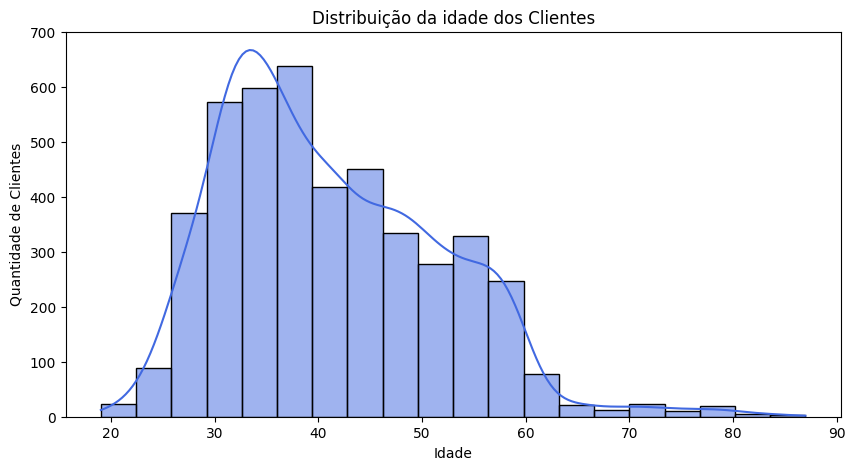

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_bank['age'], bins=20, kde=True, color='royalblue')
plt.title('Distribuição da idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Clientes')


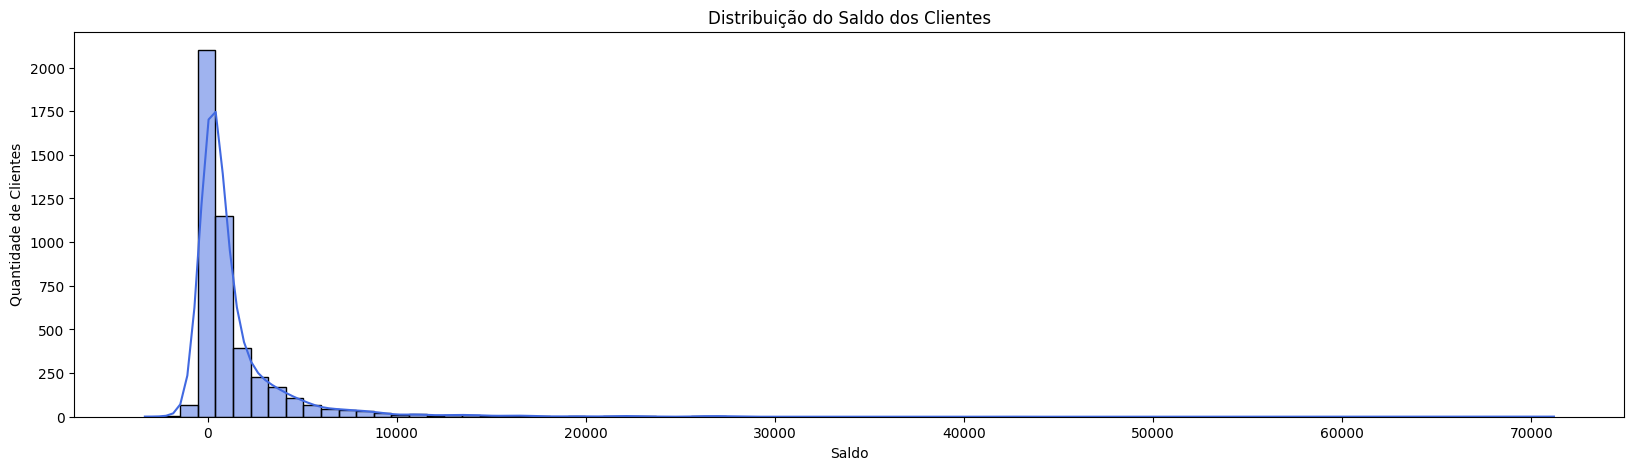

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(df_bank['balance'], bins=80, kde=True, color='royalblue')
plt.title('Distribuição do Saldo dos Clientes')
plt.xlabel('Saldo')
plt.ylabel('Quantidade de Clientes')
plt.show()

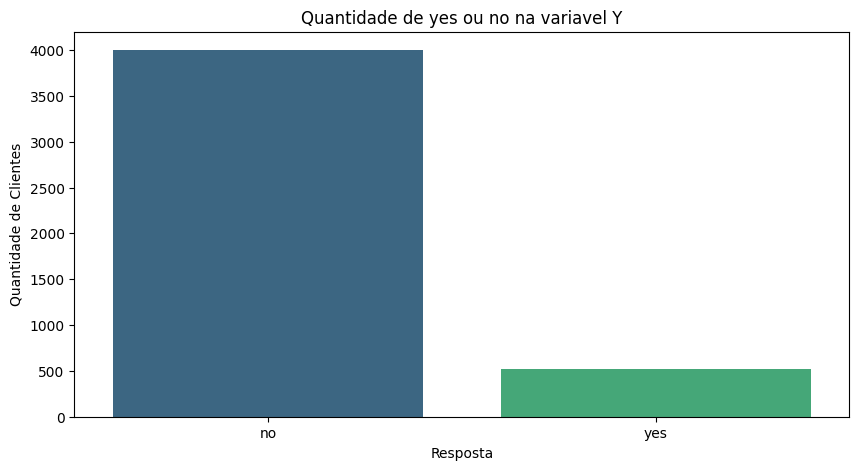

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='y', hue='y', data=df_bank, palette='viridis')
plt.title('Quantidade de yes ou no na variavel Y')
plt.xlabel('Resposta')
plt.ylabel('Quantidade de Clientes')
plt.show()

Text(0, 0.5, 'taxa de sucesso')

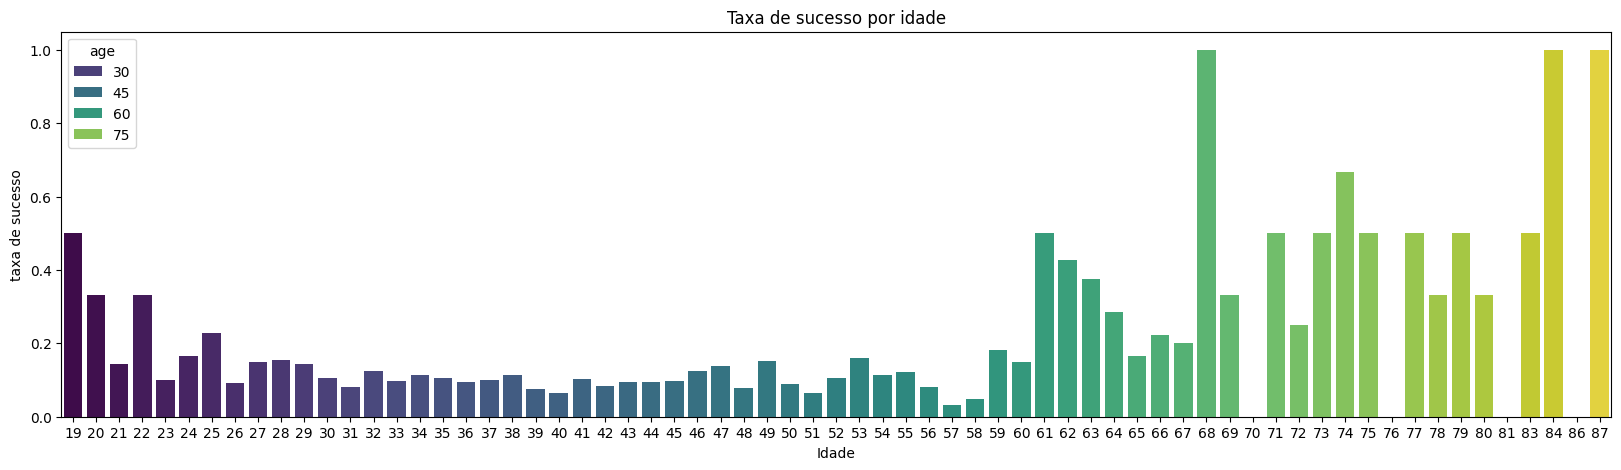

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x='age', y=df_bank['y'].eq('yes').astype(int), hue='age', data=df_bank, palette='viridis', errorbar=None)
plt.title('Taxa de sucesso por idade')
plt.xlabel('Idade')
plt.ylabel('taxa de sucesso')


In [ ]:
tabela_agrupada = df_bank.groupby('age')['y'].value_counts().unstack().fillna(0)
print(tabela_agrupada)

y      no  yes
age           
19    2.0  2.0
20    2.0  1.0
21    6.0  1.0
22    6.0  3.0
23   18.0  2.0
..    ...  ...
81    1.0  0.0
83    2.0  2.0
84    0.0  1.0
86    1.0  0.0
87    0.0  1.0

[67 rows x 2 columns]


In [ ]:
fig = px.parallel_categories(df_bank, dimensions=['loan', 'job', 'housing'], color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Relação entre loan, job e housing')
fig.show()

In [ ]:
grafico = px.treemap(df_bank, path=['job', 'education'])
grafico.show()

In [ ]:
fig= px.sunburst(df_bank, path=['job', 'marital'], values=df_bank['balance'].abs(), color='job')
fig.show()

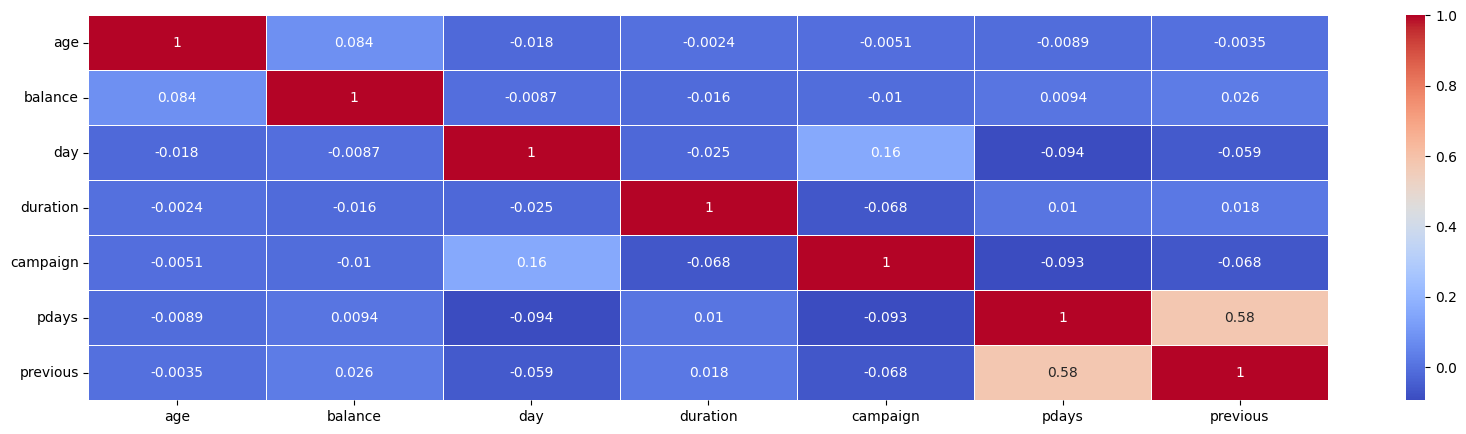

In [ ]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_bank.corr(numeric_only=True), annot=True, cmap='coolwarm',linewidths=.5)
plt.show()